# Deutsch-Jozsa Algorithm

## Step 1. Map the problem

### Setup

In [19]:
# Qiskit imports
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Plotting routines
from qiskit.visualization import plot_distribution


In [20]:
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)

### Create a circuit

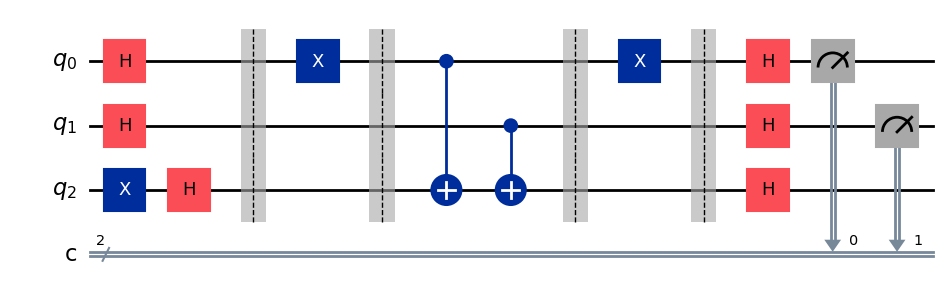

In [21]:
# n qubit
n = 2
# Create a circuit with n+1 qubits
q = QuantumRegister(n+1, 'q')
c = ClassicalRegister(n, 'c')
qc= QuantumCircuit(q, c)

# Initialize last qubit to 1
qc.x(n)

# Generate all superpositions
qc.h(range(n+1))

# Balanced function
qc.barrier()
qc.x(0)
qc.barrier()
for q in range(n):
    qc.cx(q, n)
qc.barrier()
qc.x(0)
qc.barrier()

qc.h(range(n+1))

# Measure
qc.measure(0,0)
qc.measure(1,1)
# Drawing the circuit
qc.draw(output="mpl")

## Step 2: Optimize the problem

### ISA circuit

In [22]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)
#isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

## Step 3. Execute using Qiskit primitives

In [ ]:
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit]).result()
id = job.job_id()
print(id)


In [25]:
job = service.job(id)
job_result = job.result()
counts = job_result[0].data.c.get_counts()

## Step 4. Post-process, return result in classical format

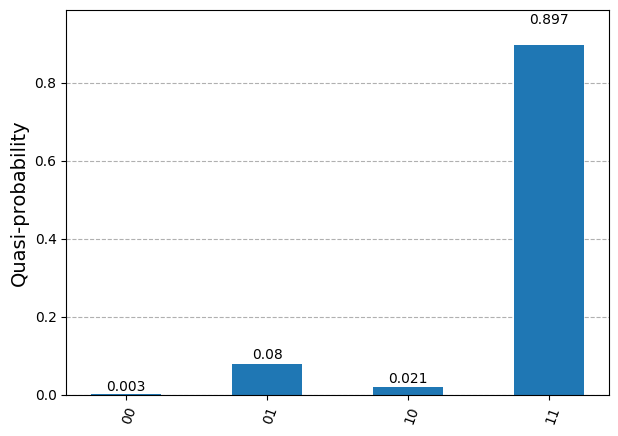

In [26]:
plot_distribution(counts)

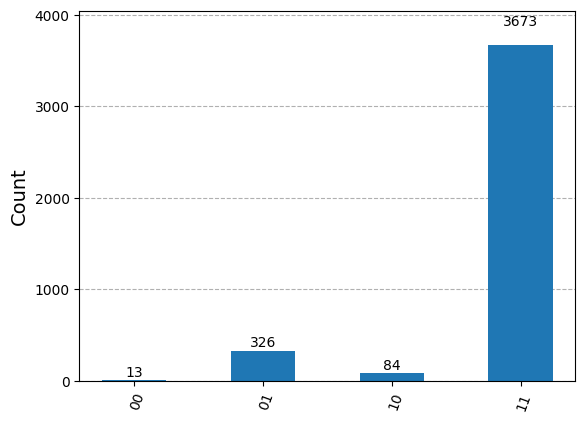

In [27]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)